DA311 - ASSIGNMENT -1

TASK-1

In [1]:
#importing modules
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [2]:
#generating n =100 random values of x in [-10,10]

#defining the parameters for the line
a = 2
b = 3
n = 100 #no.of random points to be generated
x = []
for i in range(n):
    x.append(rd.randint(-10,10))


In [3]:
y1 = []
for xi in x:
    yi = (a*xi)+b
    y1.append(yi)

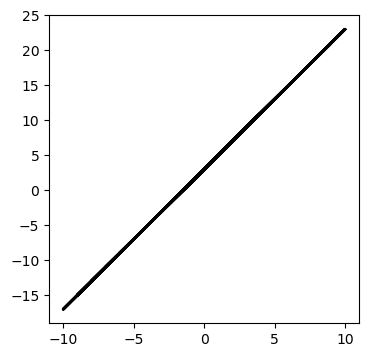

In [4]:
ax, fig = plt.subplots(1,1,figsize=(4,4))
fig.plot(x,y1,color='black',linewidth=2)
plt.show()

In [5]:
#generating n normal distributed random points 
mu = 0
sigma = 1
N = np.random.normal(mu,sigma,n)

#generating y with the noise included
y1_ = []
for i in range(len(y1)):
     y1_ .append(y1[i] + N[i])

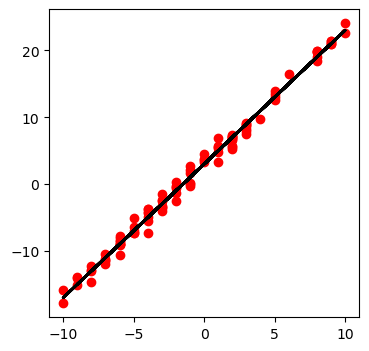

In [6]:
#scatter plot of noisy points
ax , fig = plt.subplots(1,1,figsize=(4,4))
fig.plot(x,y1,color='black',linewidth=2)
fig.scatter(x,y1_,color = 'red')
plt.show()

TASK-2

In [7]:
a = [ai for ai in np.arange(-10,10.01,0.1)]
b = [bi for bi in np.arange(-10,10.01,0.1)]
mu = 0
sigma = 1
Er = []
for ai in a:
    E = []
    for bi in b:
        e = []
        y2 = []
        y2_ = []
        for xi in x: 
            yi = (ai*xi)+bi
            y2.append(yi)
        N_ = np.random.normal(mu,sigma,n)
        for i in range(len(y2)):
            y2_.append(y2[i] + N_[i])
            e.append(y2_[i] - y2[i]) #element-wise error
        E.append(e)
    Er.append(E)

In [8]:
#computing avg. error per combination
err_per_comb = []
for i in range(len(Er)):
    err= []
    for j in range(len(Er)):
        err.append(np.sum([k**2 for k in Er[i][j]])/len(Er[i][j]))
    err_per_comb.append(err)


In [9]:
#computing avg. error for all combinations 
total_err = np.sum(err_per_comb)

In [10]:
#making a,b into 2-D array for plotting
Z = np.asarray(err_per_comb)

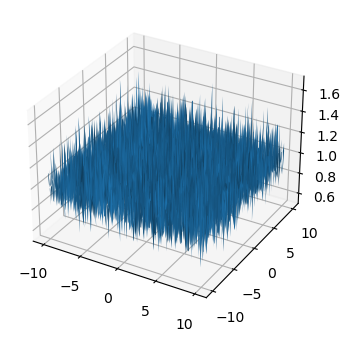

In [11]:
X, Y = np.meshgrid(a, b)
# Creating figure
fig = plt.figure(figsize =(4, 4))
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(X,Y, Z)
 
# show plot
plt.show()

TASK-3

In [12]:
parameters = 3 #a,b and a row of ones
X = np.ones(shape = (len(x),parameters))
for i in range(len(x)):
    X[i][1] = x[i]
    X[i][2] = (x[i])** 2

Y = np.ones(shape= (len(y1_)))
for i in range(len(y1_)):
    Y[i] = y1_[i]

In [13]:
#w = (xTx)-1xTy
A = np.linalg.inv(np.transpose(X)@X)
B = np.transpose(X)@Y
W = A@B
print("b:", W[0])
print("a:", W[1])

b: 2.9971459121481363
a: 2.001170985554293


TASK-4

In [14]:
#Gradient Descent

iterations = 100

#initialising weights
a = 1
b = 1

#setting learning rate
lr = 0.01

#looping through data for weight updates
for iteration in range(iterations):
    gra_a = 0
    gra_b = 0
    error = 0
    for i in range(n):
        y1_[i] = a*x[i] + b
        #Error -> squared error
        error += (y1[i] - y1_[i])**2
        gra_a += -2 * (y1[i] - y1_[i]) * x[i]
        gra_b += -2 * (y1[i] - y1_[i])
    a = a - (lr * gra_a)/n
    b = b - (lr * gra_b)/n
    error = error/n
    
    if iteration % 10 == 0:
        print(f"a {a} b {b} error {error}")

a 1.5416 b 1.026 error 29.68
a 1.958486504721525 b 1.3727105100047798 error 2.707919029637294
a 1.96602923770732 b 1.6655409031893744 error 1.8210219349313324
a 1.9721423231579704 b 1.9056780399776587 error 1.2246017408360033
a 1.97715533763404 b 2.102602279370405 error 0.823520790657124
a 1.981266255558516 b 2.264089821450103 error 0.5538016728455362
a 1.9846374100357995 b 2.396517532367485 error 0.3724208257107727
a 1.9874019221760315 b 2.5051147553666624 error 0.25044574298672884
a 1.9896689578236082 b 2.5941698085835103 error 0.16841987840090997
a 1.9915280383292024 b 2.6671993233761295 error 0.1132590839928166
